<a href="https://colab.research.google.com/github/aboltCD/aboltCD/blob/main/Inferencia_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

## Matriz de Confusión

En esta sección, utilizaremos sklearn para calcular la matriz de confusión para problemas binarios y n-arios. Comenzaremos con la matriz de confusión para problemas binarios analizando los datos del Titanic.

Primero importamos y preprocesamos algunas variables:

In [37]:
df = sbn.load_dataset("titanic")


feature_cols = ['pclass', 'parch', 'age', 'sex']
# Convierta la columna Sexo en algo que pueda alimentar a un modelo
df['sex'] = df.sex.map({'male': 0, 'female': 1})

# Eliminar filas donde la edad es nan del conjunto de datos
df = df.loc[~df['age'].isnull(), :]

# Crear matriz de características y vector objetivo
X = df.loc[:, feature_cols]
y = df['survived']

Ahora, dividimos los datos en entrenamiento y prueba:

In [38]:
# Dividimos los datos en entrenamiento (train) y prueba (test):
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


Ahora creamos un primero modelo de clasificación (Regresión Logística) y lo entrenamos:

In [39]:
# Crearemos primero una instancia básica de un modelo (en este caso una Regresión Logística)
logreg = LogisticRegression()
# Entrena el modelo con los datos
logreg.fit(X_train, y_train);
# predicciones de clase (no probabilidades predichas)


Ahora imprimimos su matriz de confusión con y sin normalización:

Resultados de la Regresión Logística:


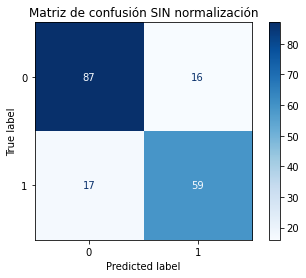

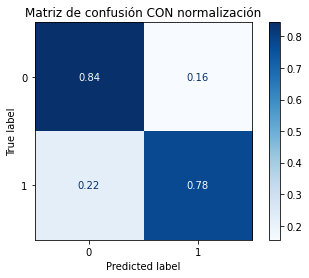

In [40]:
#Creamos los plots de cada matriz
disp = plot_confusion_matrix(logreg, X_test, y_test, 
                             cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Matriz de confusión SIN normalización")


disp2 = plot_confusion_matrix(logreg, X_test, y_test,
                                 cmap=plt.cm.Blues, normalize='true')
disp2.ax_.set_title("Matriz de confusión CON normalización")

#Finalemnte los imprimimos
print("Resultados de la Regresión Logística:")
plt.show()

Ahora evaluamos los datos de prueba manualmente para calcular las métricas de rendimiento (accuracy)

In [41]:
predicted = logreg.predict(X_test)
print("Accuracy of logreg: ", accuracy_score(y_test,predicted))

Accuracy of logreg:  0.8156424581005587


Ahora repetimos el proceso, pero con otro clasificador (en este caso, un SVM)

Resultados del SVM:


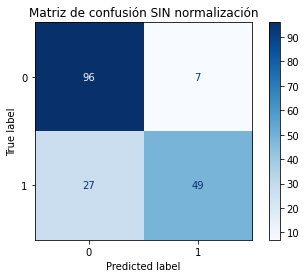

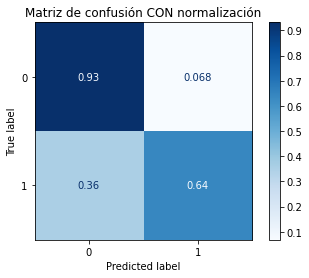

Accuracy of SVM:  0.8100558659217877


In [42]:
# Ahora usamos un clasificador (en este caso un SVM)
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

#Creamos los plots de cada matriz
disp = plot_confusion_matrix(classifier, X_test, y_test, 
                             cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Matriz de confusión SIN normalización")


disp2 = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues, normalize='true')
disp2.ax_.set_title("Matriz de confusión CON normalización")

#Finalemnte los imprimimos
print("Resultados del SVM:")

plt.show()

predicted = classifier.predict(X_test)
print("Accuracy of SVM: ", accuracy_score(y_test,predicted))


# Solución al ejercicio de clases:
Ahora para clasificación n-aria con el dataset de Iris (en este caso, n=3):

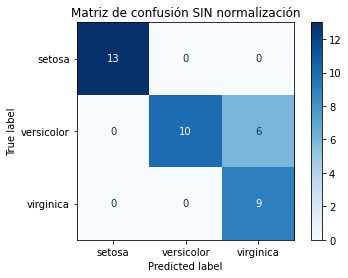

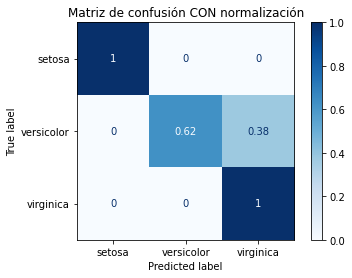

Accuracy of SVM:  0.8421052631578947


In [43]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Dividimos los datos en entrenamiento (train) y prueba (test):
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Usamos un clasificador (en este caso un SVM)
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)


#Creamos los plots de cada matriz
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=class_names, 
                             cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Matriz de confusión SIN normalización")


disp2 = plot_confusion_matrix(classifier, X_test, y_test, display_labels=class_names,
                                 cmap=plt.cm.Blues, normalize='true')
disp2.ax_.set_title("Matriz de confusión CON normalización")

#Finalemnte los imprimimos
plt.show()

predicted = classifier.predict(X_test)
print("Accuracy of SVM: ", accuracy_score(y_test,predicted))